In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
df = pd.read_csv("data.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [138]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

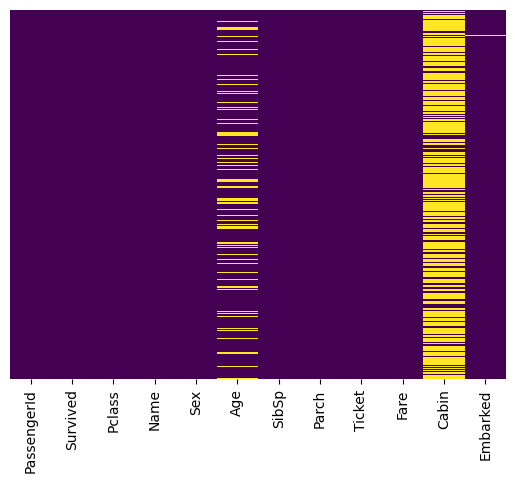

In [139]:
#visually kon kon column e null value ase dekhar jonne
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [140]:
#891 ta data, Cabin column e missing 687. (50% er upore null thakle oi column drop kora better)
df.drop(['PassengerId','Name','Cabin'],axis=1, inplace=True) 
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [141]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [142]:
#Embarked column e jegula null value silo, oi column er mode value diye sei null gula replace kore disi
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [143]:
#df['Your age?']=df['Your age?'].fillna(df['Your age?'].mean())

In [144]:
def fill_null_with_random(df, column_name):
    # Count the number of null values in the specified column
    null_count = df[column_name].isnull().sum()
    
    # Generate random values from the non-null values in the column
    random_values = df[column_name].dropna().sample(null_count, replace=True)
    
    # Replace null values with random values
    df.loc[df[column_name].isnull(), column_name] = random_values.values
    
    return df
    
df = fill_null_with_random(df, "Age")

In [145]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [146]:
from sklearn.preprocessing import LabelEncoder

In [147]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Sex', 'Ticket', 'Embarked'], dtype='object')


In [148]:
label_encoders = {}

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,523,7.2500,2
1,1,1,0,38.0,1,0,596,71.2833,0
2,1,3,0,26.0,0,0,669,7.9250,2
3,1,1,0,35.0,1,0,49,53.1000,2
4,0,3,1,35.0,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,101,13.0000,2
887,1,1,0,19.0,0,0,14,30.0000,2
888,0,3,0,15.0,1,2,675,23.4500,2
889,1,1,1,26.0,0,0,8,30.0000,0


In [149]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

In [150]:
x = df.drop(columns=['Fare'])
x

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Embarked
0,0,3,1,22.0,1,0,523,2
1,1,1,0,38.0,1,0,596,0
2,1,3,0,26.0,0,0,669,2
3,1,1,0,35.0,1,0,49,2
4,0,3,1,35.0,0,0,472,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,101,2
887,1,1,0,19.0,0,0,14,2
888,0,3,0,15.0,1,2,675,2
889,1,1,1,26.0,0,0,8,0


In [151]:
y = df['Fare']
y

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [152]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [153]:
select = SelectKBest(score_func=chi2)

In [154]:
b_select=select.fit(x,y)

/home/sakibnjr/.local/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=8. All the features will be returned.
  warnings.warn(


ValueError: Unknown label type: (array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
         8.05  ,  31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,
        18.    ,   7.225 ,  26.    ,  13.    ,   8.0292,  35.5   ,
        21.075 ,  31.3875,   7.225 , 263.    ,   7.8792,   7.8958,
        27.7208, 146.5208,   7.75  ,  10.5   ,  82.1708,  52.    ,
         7.2292,   8.05  ,  18.    ,  11.2417,   9.475 ,  21.    ,
         7.8958,  41.5792,   7.8792,   8.05  ,  15.5   ,   7.75  ,
        21.6792,  17.8   ,  39.6875,   7.8   ,  76.7292,  26.    ,
        61.9792,  35.5   ,  10.5   ,   7.2292,  27.75  ,  46.9   ,
         7.2292,  80.    ,  83.475 ,  27.9   ,  27.7208,  15.2458,
        10.5   ,   8.1583,   7.925 ,   8.6625,  10.5   ,  46.9   ,
        73.5   ,  14.4542,  56.4958,   7.65  ,   7.8958,   8.05  ,
        29.    ,  12.475 ,   9.    ,   9.5   ,   7.7875,  47.1   ,
        10.5   ,  15.85  ,  34.375 ,   8.05  , 263.    ,   8.05  ,
         8.05  ,   7.8542,  61.175 ,  20.575 ,   7.25  ,   8.05  ,
        34.6542,  63.3583,  23.    ,  26.    ,   7.8958,   7.8958,
        77.2875,   8.6542,   7.925 ,   7.8958,   7.65  ,   7.775 ,
         7.8958,  24.15  ,  52.    ,  14.4542,   8.05  ,   9.825 ,
        14.4583,   7.925 ,   7.75  ,  21.    , 247.5208,  31.275 ,
        73.5   ,   8.05  ,  30.0708,  13.    ,  77.2875,  11.2417,
         7.75  ,   7.1417,  22.3583,   6.975 ,   7.8958,   7.05  ,
        14.5   ,  26.    ,  13.    ,  15.0458,  26.2833,  53.1   ,
         9.2167,  79.2   ,  15.2458,   7.75  ,  15.85  ,   6.75  ,
        11.5   ,  36.75  ,   7.7958,  34.375 ,  26.    ,  13.    ,
        12.525 ,  66.6   ,   8.05  ,  14.5   ,   7.3125,  61.3792,
         7.7333,   8.05  ,   8.6625,  69.55  ,  16.1   ,  15.75  ,
         7.775 ,   8.6625,  39.6875,  20.525 ,  55.    ,  27.9   ,
        25.925 ,  56.4958,  33.5   ,  29.125 ,  11.1333,   7.925 ,
        30.6958,   7.8542,  25.4667,  28.7125,  13.    ,   0.    ,
        69.55  ,  15.05  ,  31.3875,  39.    ,  22.025 ,  50.    ,
        15.5   ,  26.55  ,  15.5   ,   7.8958,  13.    ,  13.    ,
         7.8542,  26.    ,  27.7208, 146.5208,   7.75  ,   8.4042,
         7.75  ,  13.    ,   9.5   ,  69.55  ,   6.4958,   7.225 ,
         8.05  ,  10.4625,  15.85  ,  18.7875,   7.75  ,  31.    ,
         7.05  ,  21.    ,   7.25  ,  13.    ,   7.75  , 113.275 ,
         7.925 ,  27.    ,  76.2917,  10.5   ,   8.05  ,  13.    ,
         8.05  ,   7.8958,  90.    ,   9.35  ,  10.5   ,   7.25  ,
        13.    ,  25.4667,  83.475 ,   7.775 ,  13.5   ,  31.3875,
        10.5   ,   7.55  ,  26.    ,  26.25  ,  10.5   ,  12.275 ,
        14.4542,  15.5   ,  10.5   ,   7.125 ,   7.225 ,  90.    ,
         7.775 ,  14.5   ,  52.5542,  26.    ,   7.25  ,  10.4625,
        26.55  ,  16.1   ,  20.2125,  15.2458,  79.2   ,  86.5   ,
       512.3292,  26.    ,   7.75  ,  31.3875,  79.65  ,   0.    ,
         7.75  ,  10.5   ,  39.6875,   7.775 , 153.4625, 135.6333,
        31.    ,   0.    ,  19.5   ,  29.7   ,   7.75  ,  77.9583,
         7.75  ,   0.    ,  29.125 ,  20.25  ,   7.75  ,   7.8542,
         9.5   ,   8.05  ,  26.    ,   8.6625,   9.5   ,   7.8958,
        13.    ,   7.75  ,  78.85  ,  91.0792,  12.875 ,   8.85  ,
         7.8958,  27.7208,   7.2292, 151.55  ,  30.5   , 247.5208,
         7.75  ,  23.25  ,   0.    ,  12.35  ,   8.05  , 151.55  ,
       110.8833, 108.9   ,  24.    ,  56.9292,  83.1583, 262.375 ,
        26.    ,   7.8958,  26.25  ,   7.8542,  26.    ,  14.    ,
       164.8667, 134.5   ,   7.25  ,   7.8958,  12.35  ,  29.    ,
        69.55  , 135.6333,   6.2375,  13.    ,  20.525 ,  57.9792,
        23.25  ,  28.5   , 153.4625,  18.    , 133.65  ,   7.8958,
        66.6   , 134.5   ,   8.05  ,  35.5   ,  26.    , 263.    ,
        13.    ,  13.    ,  13.    ,  13.    ,  13.    ,  16.1   ,
        15.9   ,   8.6625,   9.225 ,  35.    ,   7.2292,  17.8   ,
         7.225 ,   9.5   ,  55.    ,  13.    ,   7.8792,   7.8792,
        27.9   ,  27.7208,  14.4542,   7.05  ,  15.5   ,   7.25  ,
        75.25  ,   7.2292,   7.75  ,  69.3   ,  55.4417,   6.4958,
         8.05  , 135.6333,  21.075 ,  82.1708,   7.25  , 211.5   ,
         4.0125,   7.775 , 227.525 ,  15.7417,   7.925 ,  52.    ,
         7.8958,  73.5   ,  46.9   ,  13.    ,   7.7292,  12.    ,
       120.    ,   7.7958,   7.925 , 113.275 ,  16.7   ,   7.7958,
         7.8542,  26.    ,  10.5   ,  12.65  ,   7.925 ,   8.05  ,
         9.825 ,  15.85  ,   8.6625,  21.    ,   7.75  ,  18.75  ,
         7.775 ,  25.4667,   7.8958,   6.8583,  90.    ,   0.    ,
         7.925 ,   8.05  ,  32.5   ,  13.    ,  13.    ,  24.15  ,
         7.8958,   7.7333,   7.875 ,  14.4   ,  20.2125,   7.25  ,
        26.    ,  26.    ,   7.75  ,   8.05  ,  26.55  ,  16.1   ,
        26.    ,   7.125 ,  55.9   , 120.    ,  34.375 ,  18.75  ,
       263.    ,  10.5   ,  26.25  ,   9.5   ,   7.775 ,  13.    ,
         8.1125,  81.8583,  19.5   ,  26.55  ,  19.2583,  30.5   ,
        27.75  ,  19.9667,  27.75  ,  89.1042,   8.05  ,   7.8958,
        26.55  ,  51.8625,  10.5   ,   7.75  ,  26.55  ,   8.05  ,
        38.5   ,  13.    ,   8.05  ,   7.05  ,   0.    ,  26.55  ,
         7.725 ,  19.2583,   7.25  ,   8.6625,  27.75  ,  13.7917,
         9.8375,  52.    ,  21.    ,   7.0458,   7.5208,  12.2875,
        46.9   ,   0.    ,   8.05  ,   9.5875,  91.0792,  25.4667,
        90.    ,  29.7   ,   8.05  ,  15.9   ,  19.9667,   7.25  ,
        30.5   ,  49.5042,   8.05  ,  14.4583,  78.2667,  15.1   ,
       151.55  ,   7.7958,   8.6625,   7.75  ,   7.6292,   9.5875,
        86.5   , 108.9   ,  26.    ,  26.55  ,  22.525 ,  56.4958,
         7.75  ,   8.05  ,  26.2875,  59.4   ,   7.4958,  34.0208,
        10.5   ,  24.15  ,  26.    ,   7.8958,  93.5   ,   7.8958,
         7.225 ,  57.9792,   7.2292,   7.75  ,  10.5   , 221.7792,
         7.925 ,  11.5   ,  26.    ,   7.2292,   7.2292,  22.3583,
         8.6625,  26.25  ,  26.55  , 106.425 ,  14.5   ,  49.5   ,
        71.    ,  31.275 ,  31.275 ,  26.    , 106.425 ,  26.    ,
        26.    ,  13.8625,  20.525 ,  36.75  , 110.8833,  26.    ,
         7.8292,   7.225 ,   7.775 ,  26.55  ,  39.6   , 227.525 ,
        79.65  ,  17.4   ,   7.75  ,   7.8958,  13.5   ,   8.05  ,
         8.05  ,  24.15  ,   7.8958,  21.075 ,   7.2292,   7.8542,
        10.5   ,  51.4792,  26.3875,   7.75  ,   8.05  ,  14.5   ,
        13.    ,  55.9   ,  14.4583,   7.925 ,  30.    , 110.8833,
        26.    ,  40.125 ,   8.7125,  79.65  ,  15.    ,  79.2   ,
         8.05  ,   8.05  ,   7.125 ,  78.2667,   7.25  ,   7.75  ,
        26.    ,  24.15  ,  33.    ,   0.    ,   7.225 ,  56.9292,
        27.    ,   7.8958,  42.4   ,   8.05  ,  26.55  ,  15.55  ,
         7.8958,  30.5   ,  41.5792, 153.4625,  31.275 ,   7.05  ,
        15.5   ,   7.75  ,   8.05  ,  65.    ,  14.4   ,  16.1   ,
        39.    ,  10.5   ,  14.4542,  52.5542,  15.7417,   7.8542,
        16.1   ,  32.3208,  12.35  ,  77.9583,   7.8958,   7.7333,
        30.    ,   7.0542,  30.5   ,   0.    ,  27.9   ,  13.    ,
         7.925 ,  26.25  ,  39.6875,  16.1   ,   7.8542,  69.3   ,
        27.9   ,  56.4958,  19.2583,  76.7292,   7.8958,  35.5   ,
         7.55  ,   7.55  ,   7.8958,  23.    ,   8.4333,   7.8292,
         6.75  ,  73.5   ,   7.8958,  15.5   ,  13.    , 113.275 ,
       133.65  ,   7.225 ,  25.5875,   7.4958,   7.925 ,  73.5   ,
        13.    ,   7.775 ,   8.05  ,  52.    ,  39.    ,  52.    ,
        10.5   ,  13.    ,   0.    ,   7.775 ,   8.05  ,   9.8417,
        46.9   , 512.3292,   8.1375,  76.7292,   9.225 ,  46.9   ,
        39.    ,  41.5792,  39.6875,  10.1708,   7.7958, 211.3375,
        57.    ,  13.4167,  56.4958,   7.225 ,  26.55  ,  13.5   ,
         8.05  ,   7.7333, 110.8833,   7.65  , 227.525 ,  26.2875,
        14.4542,   7.7417,   7.8542,  26.    ,  13.5   ,  26.2875,
       151.55  ,  15.2458,  49.5042,  26.55  ,  52.    ,   9.4833,
        13.    ,   7.65  , 227.525 ,  10.5   ,  15.5   ,   7.775 ,
        33.    ,   7.0542,  13.    ,  13.    ,  53.1   ,   8.6625,
        21.    ,   7.7375,  26.    ,   7.925 , 211.3375,  18.7875,
         0.    ,  13.    ,  13.    ,  16.1   ,  34.375 , 512.3292,
         7.8958,   7.8958,  30.    ,  78.85  , 262.375 ,  16.1   ,
         7.925 ,  71.    ,  20.25  ,  13.    ,  53.1   ,   7.75  ,
        23.    ,  12.475 ,   9.5   ,   7.8958,  65.    ,  14.5   ,
         7.7958,  11.5   ,   8.05  ,  86.5   ,  14.5   ,   7.125 ,
         7.2292, 120.    ,   7.775 ,  77.9583,  39.6   ,   7.75  ,
        24.15  ,   8.3625,   9.5   ,   7.8542,  10.5   ,   7.225 ,
        23.    ,   7.75  ,   7.75  ,  12.475 ,   7.7375, 211.3375,
         7.2292,  57.    ,  30.    ,  23.45  ,   7.05  ,   7.25  ,
         7.4958,  29.125 ,  20.575 ,  79.2   ,   7.75  ,  26.    ,
        69.55  ,  30.6958,   7.8958,  13.    ,  25.9292,   8.6833,
         7.2292,  24.15  ,  13.    ,  26.25  , 120.    ,   8.5167,
         6.975 ,   7.775 ,   0.    ,   7.775 ,  13.    ,  53.1   ,
         7.8875,  24.15  ,  10.5   ,  31.275 ,   8.05  ,   0.    ,
         7.925 ,  37.0042,   6.45  ,  27.9   ,  93.5   ,   8.6625,
         0.    ,  12.475 ,  39.6875,   6.95  ,  56.4958,  37.0042,
         7.75  ,  80.    ,  14.4542,  18.75  ,   7.2292,   7.8542,
         8.3   ,  83.1583,   8.6625,   8.05  ,  56.4958,  29.7   ,
         7.925 ,  10.5   ,  31.    ,   6.4375,   8.6625,   7.55  ,
        69.55  ,   7.8958,  33.    ,  89.1042,  31.275 ,   7.775 ,
        15.2458,  39.4   ,  26.    ,   9.35  , 164.8667,  26.55  ,
        19.2583,   7.2292,  14.1083,  11.5   ,  25.9292,  69.55  ,
        13.    ,  13.    ,  13.8583,  50.4958,   9.5   ,  11.1333,
         7.8958,  52.5542,   5.    ,   9.    ,  24.    ,   7.225 ,
         9.8458,   7.8958,   7.8958,  83.1583,  26.    ,   7.8958,
        10.5167,  10.5   ,   7.05  ,  29.125 ,  13.    ,  30.    ,
        23.45  ,  30.    ,   7.75  ]),)

In [155]:
b_select.scores_

array([1.14144098e+01, 1.16404377e+01, 1.58025275e+01, 6.83331080e-02,
       4.58896410e-01,            nan,            nan, 2.78323040e+00,
       2.87023682e-01, 5.71641542e-02, 2.92021455e+00, 1.06708048e+00,
       2.41897848e-01, 1.15155235e+00, 9.17339267e-01, 6.89201987e+01])

In [156]:
pd.DataFrame(b_select.scores_,columns=['Score'])

,Score
0,11.414410
1,11.640438
2,15.802528
3,0.068333
4,0.458896
5,NaN
6,NaN
7,2.783230
8,0.287024
9,0.057164


In [157]:
c_score = pd.DataFrame(b_select.scores_,columns=['Score'])

In [158]:
c_col = pd.DataFrame(x.columns)

In [159]:
rank = pd.concat([c_col,c_score],axis=1)

In [160]:
rank.nlargest(5,'Score')

,0,Score
15,NaN,68.920199
2,Sex,15.802528
1,Pclass,11.640438
0,Survived,11.414410
10,NaN,2.920215


In [161]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [162]:
fit_features = SelectKBest(score_func = f_classif)
fit_features.fit(x,y)

/home/sakibnjr/.local/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=8. All the features will be returned.
  warnings.warn(


SelectKBest()

In [163]:
fs = pd.DataFrame(fit_features.scores_,index=x.columns, columns = ['score values'])
fs

,score values
Survived,2.382848
Pclass,108.200890
Sex,1.841562
Age,1.803883
SibSp,13.810146
Parch,7.348440
Ticket,12.662734
Embarked,26.979346


In [164]:
sp = fs.nlargest(5,'score values')
sp

,score values
Pclass,108.200890
Embarked,26.979346
SibSp,13.810146
Ticket,12.662734
Parch,7.348440


In [165]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

In [166]:
xinput = ['Pclass','Embarked','SibSp','Ticket','Parch']

In [167]:
X = df[xinput]

In [168]:
Y = df['Fare']

In [169]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=0.2, random_state=42)

In [170]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [171]:
#model = LinearRegression()
# rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42) 
# knn = KNeighborsClassifier(n_neighbors=3)

In [172]:
rf.fit(Xtrain, Ytrain)

RandomForestRegressor(random_state=42)

In [173]:
X.dtypes

Pclass      int64
Embarked    int64
SibSp       int64
Ticket      int64
Parch       int64
dtype: object

In [174]:
Y.dtypes

dtype('float64')

In [177]:
y_pred = rf.predict(Xtest)

# from sklearn.metrics import accuracy_score

# accuracy_score(Ytest,y_pred)

In [182]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [183]:
# Calculate metrics
mse = mean_squared_error(Ytest, y_pred)
rmse = mean_squared_error(Ytest, y_pred, squared=False)  # Root MSE
mae = mean_absolute_error(Ytest, y_pred)
r2 = r2_score(Ytest, y_pred)

/home/sakibnjr/.local/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [184]:
# Output scores
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R2):', r2)

Mean Squared Error (MSE): 1557.636510770778
Root Mean Squared Error (RMSE): 39.466903992722536
Mean Absolute Error (MAE): 12.170289050279331
R-squared (R2): -0.006596029448688867
